In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gp
import statsmodels.api as sm
import math
import statsmodels.api as sm
from scipy import polyfit, polyval
from datetime import datetime
from datetime import timedelta

from shapely.geometry import Point

In [2]:
crime_highline = gp.read_file("Crime_highline/crime_highline.shp")

In [3]:
crime_highline.head()

,BORO_NM,CMPLNT_NUM,Field1,LAW_CAT_CD,LOC_OF_OCC,Latitude,Longitude,OFNS_DESC,PREM_TYP_D,RPT_DT,geometry
0,MANHATTAN,586068632,0,MISDEMEANOR,INSIDE,40.756266,-73.990501,DANGEROUS DRUGS,BUS TERMINAL,2016-12-31,POINT (-73.990501248 40.756266207)
1,MANHATTAN,100511069,4,FELONY,INSIDE,40.760586,-73.985927,GRAND LARCENY,BAR/NIGHT CLUB,2016-12-31,POINT (-73.9859271 40.760585967)
2,MANHATTAN,968795783,10,FELONY,FRONT OF,40.760106,-73.987703,GRAND LARCENY,STREET,2016-12-31,POINT (-73.987703177 40.760105841)
3,MANHATTAN,435625245,22,FELONY,INSIDE,40.756266,-73.990501,GRAND LARCENY,BUS TERMINAL,2016-12-31,POINT (-73.990501248 40.756266207)
4,MANHATTAN,245422587,27,FELONY,INSIDE,40.756266,-73.990501,CRIMINAL MISCHIEF & RELATED OF,BUS TERMINAL,2016-12-31,POINT (-73.990501248 40.756266207)


# Petit Larceny Highline

In [208]:
crime_highline.RPT_DT = pd.to_datetime(crime_highline.RPT_DT)

In [209]:
petit_larceny = crime_highline[crime_highline.OFNS_DESC == 'PETIT LARCENY']

In [239]:
petit_larceny_timeseries = petit_larceny.set_index('RPT_DT').groupby(pd.TimeGrouper('W')).count()
petit_larceny_timeseries.reset_index(inplace=True)

In [240]:
dates = sum(map(lambda y: map(lambda x: str(x)+"/"+str(y), range(1, 13)), range(2006, 2017)), [])

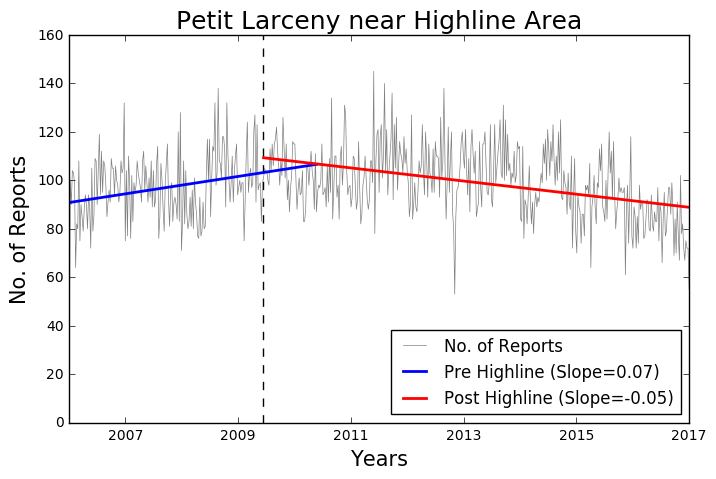

In [255]:
a1,b1=polyfit(range(len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09'])), 
              petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09'].loc[:,'CMPLNT_NUM'],1)
linreg1=polyval([a1,b1],range(len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09'])+50))

a2,b2=polyfit(range(len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09']),
                    len(petit_larceny_timeseries)),
              petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT >= '2009-06-09'].loc[:,'CMPLNT_NUM'],1)

linreg2=polyval([a2,b2],range(len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09']),
                              len(petit_larceny_timeseries)))

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(petit_larceny_timeseries.RPT_DT, petit_larceny_timeseries.loc[:,'CMPLNT_NUM'], 
        label = "No. of Reports", color = "Grey", linewidth = 0.5)

# ax.plot(range(len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09'])+50), linreg1, 
#         label = "Crime pre Highline (Slope="+str(round(a1,2))+")", linewidth = 3, color = "Blue")
ax.plot(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < petit_larceny_timeseries.iloc[len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09'])+50]['RPT_DT']]['RPT_DT'],
        linreg1, label = "Pre Highline (Slope="+str(round(a1,2))+")", linewidth = 2, color = "Blue")

ax.vlines('2009-06-09', 0, 160, linestyles='--')
ax.plot(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT > '2009-06-09']['RPT_DT'], 
        linreg2, label = "Post Highline (Slope="+str(round(a2,2))+")", linewidth = 2, color = "Red")

# ax.grid()
ax.set_xlabel('Years', size = 15)
ax.set_ylabel('No. of Reports', size = 15)
ax.set_title('Petit Larceny near Highline Area', size = 18)
plt.legend(loc="lower right")
plt.show()

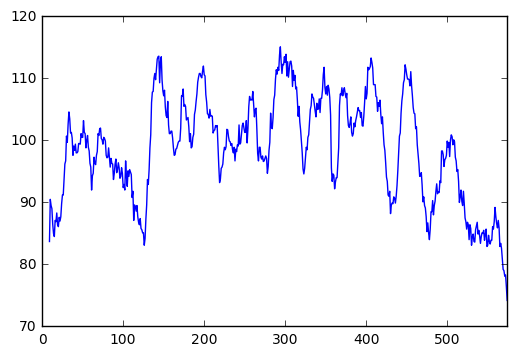

In [147]:
petit_larceny_timeseries.BORO_NM.rolling(window=10,center=False).mean().plot()

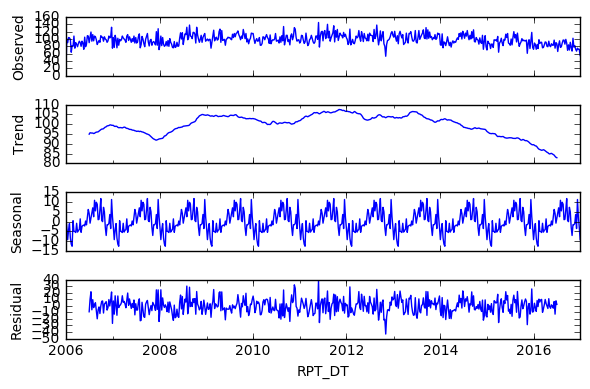

In [47]:
# plt.figure(figsize=(15,12))

res1 = sm.tsa.seasonal_decompose(petit_larceny_timeseries.BORO_NM.dropna())
resplot1 = res1.plot()
# plt.figure(figsize=(12,2))
# res2 = sm.tsa.seasonal_decompose(crime_timeseries.CMPLNT_NUM.dropna())
# resplot2 = res2.seasonal.plot()

In [76]:
grand_larceny = crime_highline[crime_highline.OFNS_DESC == 'GRAND LARCENY']

In [174]:
grand_larceny_timeseries = grand_larceny.set_index('RPT_DT').groupby(pd.TimeGrouper('W')).count()
grand_larceny_timeseries.reset_index(inplace=True)

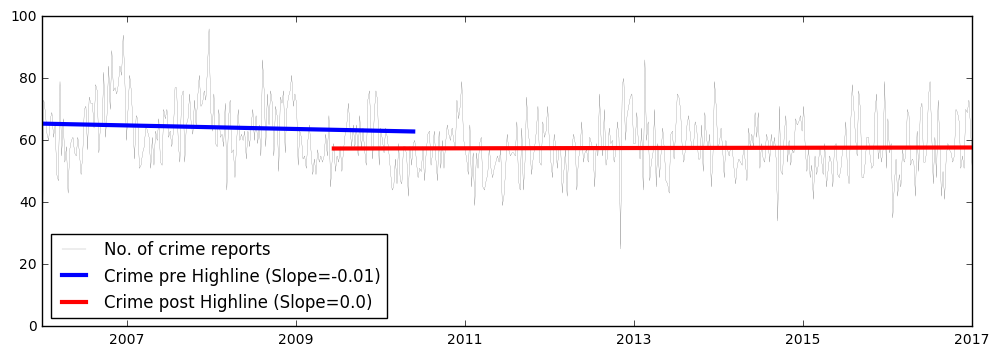

In [175]:
a1,b1=polyfit(range(len(grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT < '2009-06-09'])), 
              grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT < '2009-06-09'].loc[:,'CMPLNT_NUM'],1)
linreg1=polyval([a1,b1],range(len(grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT < '2009-06-09'])+50))

a2,b2=polyfit(range(len(grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT < '2009-06-09']),
                    len(grand_larceny_timeseries)),
              grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT >= '2009-06-09'].loc[:,'CMPLNT_NUM'],1)

linreg2=polyval([a2,b2],range(len(grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT < '2009-06-09']),
                              len(grand_larceny_timeseries)))

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(grand_larceny_timeseries.RPT_DT, grand_larceny_timeseries.loc[:,'CMPLNT_NUM'], 
        label = "No. of crime reports", color = "Black", linewidth = 0.1)

# ax.plot(range(len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09'])+50), linreg1, 
#         label = "Crime pre Highline (Slope="+str(round(a1,2))+")", linewidth = 3, color = "Blue")
ax.plot(grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT < grand_larceny_timeseries.iloc[len(grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT < '2009-06-09'])+50]['RPT_DT']]['RPT_DT'],
        linreg1, label = "Crime pre Highline (Slope="+str(round(a1,2))+")", linewidth = 3, color = "Blue")

ax.plot(grand_larceny_timeseries[grand_larceny_timeseries.RPT_DT > '2009-06-09']['RPT_DT'], 
        linreg2, label = "Crime post Highline (Slope="+str(round(a2,2))+")", linewidth = 3, color = "Red")
# ax.set_xticklabels(petit_larceny_timeseries.RPT_DT[:])
plt.legend(loc = 'best')
plt.show()

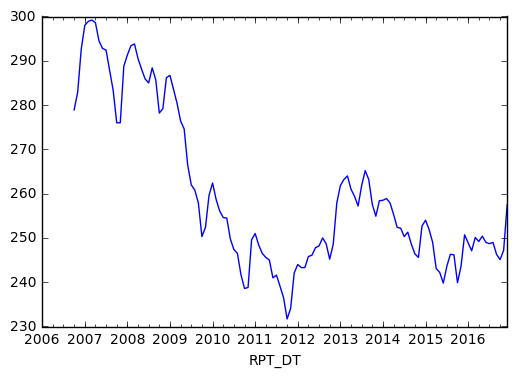

In [80]:
grand_larceny_timeseries.BORO_NM.rolling(window=10,center=False).mean().plot()

# Manhattan

In [67]:
crime_manhattan = gp.read_file('crime_man_wo_hl/crime_man_wo_hl.shp')

In [229]:
crime_manhattan.RPT_DT = pd.to_datetime(crime_manhattan.RPT_DT)

In [230]:
petit_larceny_mn = crime_manhattan[crime_manhattan.OFNS_DESC == 'PETIT LARCENY']

In [244]:
petit_larceny_mn_timeseries = petit_larceny_mn.set_index('RPT_DT').groupby(pd.TimeGrouper('W')).count()
petit_larceny_mn_timeseries.reset_index(inplace=True)

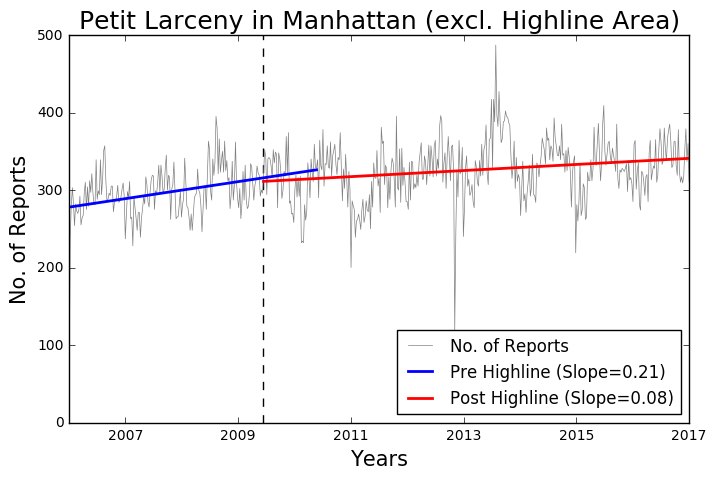

In [254]:
a1,b1=polyfit(range(len(petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT < '2009-06-09'])), 
              petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT < '2009-06-09'].loc[:,'CMPLNT_NUM'],1)
linreg1=polyval([a1,b1],range(len(petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT < '2009-06-09'])+50))

a2,b2=polyfit(range(len(petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT < '2009-06-09']),
                    len(petit_larceny_mn_timeseries)),
              petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT >= '2009-06-09'].loc[:,'CMPLNT_NUM'],1)

linreg2=polyval([a2,b2],range(len(petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT < '2009-06-09']),
                              len(petit_larceny_mn_timeseries)))

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(petit_larceny_mn_timeseries.RPT_DT, petit_larceny_mn_timeseries.loc[:,'CMPLNT_NUM'], 
        label = "No. of Reports", color = "Grey", linewidth = 0.5)

# ax.plot(range(len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09'])+50), linreg1, 
#         label = "Crime pre Highline (Slope="+str(round(a1,2))+")", linewidth = 3, color = "Blue")
ax.plot(petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT < petit_larceny_mn_timeseries.iloc[len(petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT < '2009-06-09'])+50]['RPT_DT']]['RPT_DT'],
        linreg1, label = "Pre Highline (Slope="+str(round(a1,2))+")", linewidth = 2, color = "Blue")
ax.vlines('2009-06-09', 0, 500, linestyles='--')
ax.plot(petit_larceny_mn_timeseries[petit_larceny_mn_timeseries.RPT_DT > '2009-06-09']['RPT_DT'], 
        linreg2, label = "Post Highline (Slope="+str(round(a2,2))+")", linewidth = 2, color = "Red")
# ax.set_xticklabels(petit_larceny_timeseries.RPT_DT[:])
ax.set_xlabel('Years', size = 15)
ax.set_ylabel('No. of Reports', size = 15)
ax.set_title('Petit Larceny in Manhattan (excl. Highline Area)', size = 18)
plt.legend(loc="lower right")
plt.show()

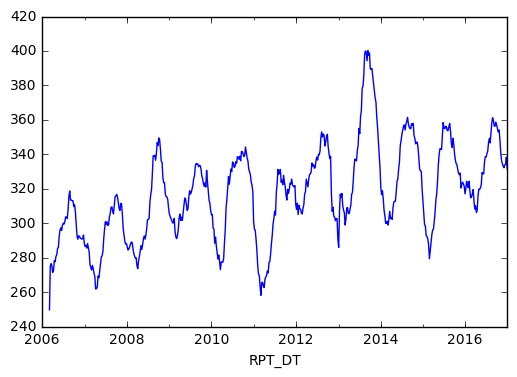

In [72]:
petit_larceny_mn_timeseries.BORO_NM.rolling(window=10,center=False).mean().plot()

In [73]:
grand_larceny_mn = crime_manhattan[crime_manhattan.OFNS_DESC == 'GRAND LARCENY']

In [159]:
grand_larceny_mn_timeseries = grand_larceny_mn.set_index('RPT_DT').groupby(pd.TimeGrouper('W')).count()
grand_larceny_mn_timeseries.reset_index(inplace=True)

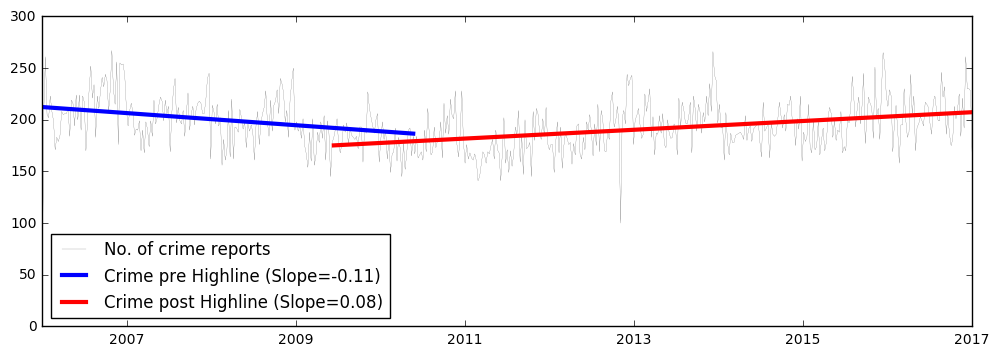

In [160]:
a1,b1=polyfit(range(len(grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT < '2009-06-09'])), 
              grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT < '2009-06-09'].loc[:,'CMPLNT_NUM'],1)
linreg1=polyval([a1,b1],range(len(grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT < '2009-06-09'])+50))

a2,b2=polyfit(range(len(grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT < '2009-06-09']),
                    len(grand_larceny_mn_timeseries)),
              grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT >= '2009-06-09'].loc[:,'CMPLNT_NUM'],1)

linreg2=polyval([a2,b2],range(len(grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT < '2009-06-09']),
                              len(grand_larceny_mn_timeseries)))

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(grand_larceny_mn_timeseries.RPT_DT, grand_larceny_mn_timeseries.loc[:,'CMPLNT_NUM'], 
        label = "No. of crime reports", color = "Black", linewidth = 0.1)

# ax.plot(range(len(petit_larceny_timeseries[petit_larceny_timeseries.RPT_DT < '2009-06-09'])+50), linreg1, 
#         label = "Crime pre Highline (Slope="+str(round(a1,2))+")", linewidth = 3, color = "Blue")
ax.plot(grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT < grand_larceny_mn_timeseries.iloc[len(grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT < '2009-06-09'])+50]['RPT_DT']]['RPT_DT'],
        linreg1, label = "Crime pre Highline (Slope="+str(round(a1,2))+")", linewidth = 3, color = "Blue")

ax.plot(grand_larceny_mn_timeseries[grand_larceny_mn_timeseries.RPT_DT > '2009-06-09']['RPT_DT'], 
        linreg2, label = "Crime post Highline (Slope="+str(round(a2,2))+")", linewidth = 3, color = "Red")
# ax.set_xticklabels(petit_larceny_timeseries.RPT_DT[:])
plt.legend(loc = 'best')
plt.show()

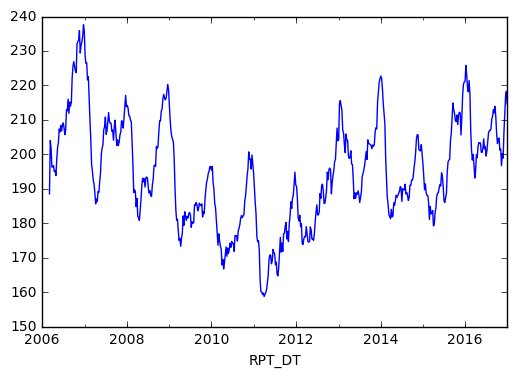

In [75]:
grand_larceny_mn_timeseries.BORO_NM.rolling(window=10,center=False).mean().plot()

# Burglary Highline?

In [193]:
burglary_highline = crime_highline[crime_highline.OFNS_DESC == 'ROBBERY']

In [194]:
burglary_highline_timeseries = burglary_highline.set_index('RPT_DT').groupby(pd.TimeGrouper('W')).count()
# burglary_highline_timeseries.reset_index(inplace=True)

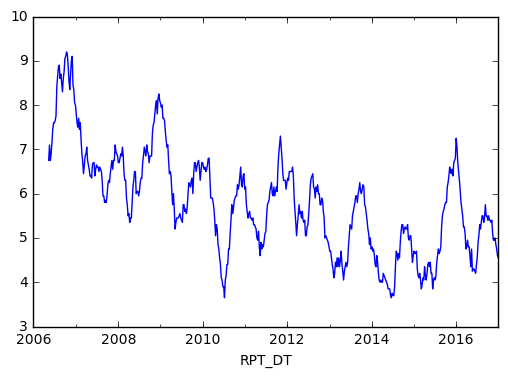

In [199]:
burglary_highline_timeseries.CMPLNT_NUM.rolling(window=20,center=False).mean().plot()

# Burglary Manhattan?

In [196]:
burglary_mn = crime_manhattan[crime_manhattan.OFNS_DESC == 'ROBBERY']

In [197]:
burglary_mn_timeseries = burglary_mn.set_index('RPT_DT').groupby(pd.TimeGrouper('W')).count()

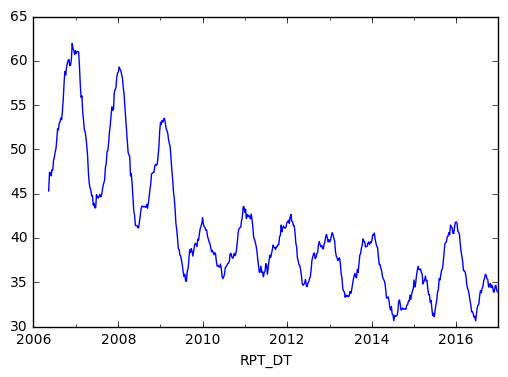

In [200]:
burglary_mn_timeseries.CMPLNT_NUM.rolling(window=20,center=False).mean().plot()